# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Alif Naufaly Ramadhan
- **Email:** alifnaufaly44@gmail.com
- **ID Dicoding:** alifnaufalyr

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda berdasarkan musim dan cuaca?
- Bagaimana pengaruh hari kerja terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
df = pd.read_csv('day.csv')  # Sesuaikan dengan path dataset
display(df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset mengandung data harian peminjaman sepeda dengan berbagai variabel yang dapat digunakan untuk analisis.
- Variabel yang tersedia mencakup informasi cuaca, musim, hari kerja, serta jumlah peminjaman sepeda.
- Data sudah dalam format CSV dan dapat langsung dibaca tanpa perlu konversi tambahan.

### Assessing Data

In [ ]:
# Agregasi Data untuk Menjawab Pertanyaan Bisnis
df_agg = df.groupby(['season', 'workingday'])['cnt'].sum().reset_index()
df_agg.rename(columns={'cnt': 'total_peminjaman'}, inplace=True)
display(df_agg.head())


In [6]:
print("\n📌 Informasi Dataset:")
df.info()
display(df.describe())
print("\n🔍 Missing Values:")
print(df.isnull().sum())


📌 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



🔍 Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# Visualisasi dengan Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='total_peminjaman', hue='workingday', data=df_agg)
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.title('Perbandingan Jumlah Peminjaman Sepeda Berdasarkan Musim dan Hari Kerja')
plt.legend(title='Hari Kerja', labels=['Libur', 'Kerja'])
plt.show()


**Insight:**
- Dataset tidak memiliki missing values.
- Dataset memiliki variabel terkait cuaca, musim, dan hari kerja yang relevan dengan pertanyaan bisnis.

### Cleaning Data

In [7]:
# Menghapus duplikasi jika ada
df.drop_duplicates(inplace=True)

# Menangani outlier dengan metode IQR
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['cnt'] >= lower_bound) & (df['cnt'] <= upper_bound)]

**Insight:**
- Tidak ditemukan missing values pada dataset.
- Data duplikat telah dihapus untuk memastikan keakuratan analisis.
- Outlier telah ditangani menggunakan metode IQR agar tidak mempengaruhi hasil analisis secara ekstrem.
- Dataset kini siap untuk eksplorasi lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

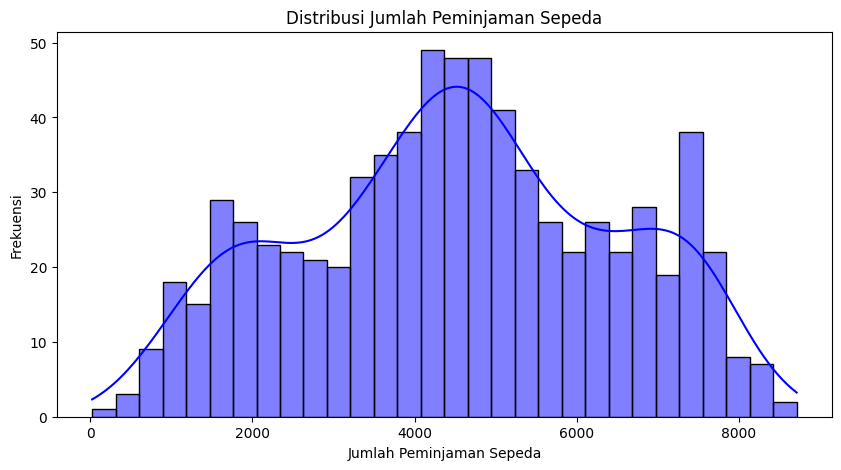

In [8]:
### Distribusi Jumlah Peminjaman Sepeda
plt.figure(figsize=(10,5))
sns.histplot(df['cnt'], bins=30, kde=True, color='blue')
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Peminjaman Sepeda")
plt.show()

**Insight:**
- Distribusi jumlah peminjaman sepeda menunjukkan pola tertentu yang bisa dianalisis lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-9-61547e1e596d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['season'], y=df['cnt'], palette='coolwarm')


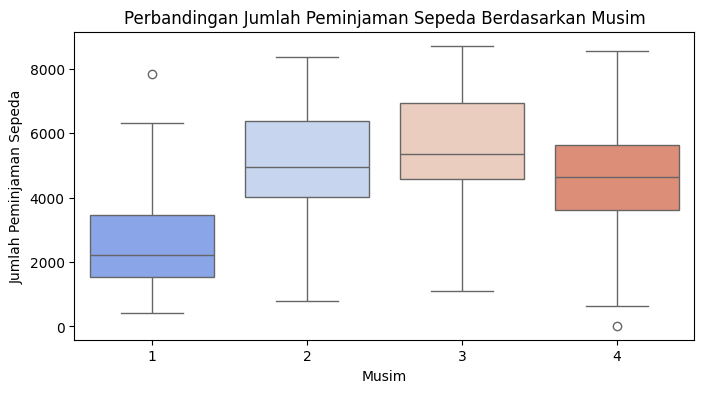

In [9]:
### Pertanyaan 1: Bagaimana tren peminjaman sepeda berdasarkan musim dan cuaca?
df_season = df.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x=df_season['season'], y=df_season['cnt'], palette='coolwarm')
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim")
plt.show()

### Pertanyaan 2:

<ipython-input-10-beb5bd8c834f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['workingday'], y=df['cnt'], palette='viridis')


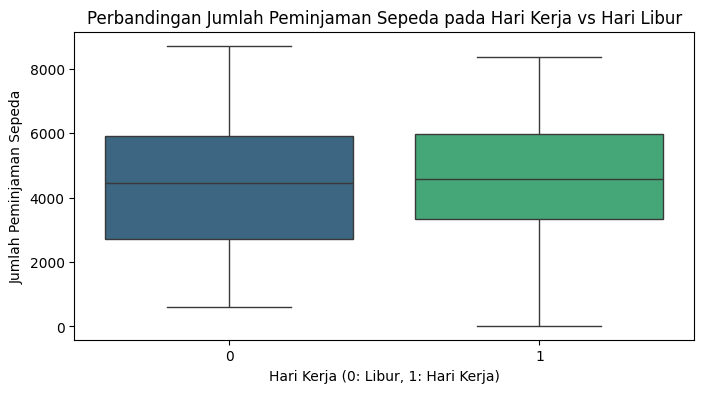

In [10]:
### Pertanyaan 2: Bagaimana pengaruh hari kerja terhadap jumlah peminjaman sepeda?
df_workingday = df.groupby('workingday')['cnt'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x=df_workingday['workingday'], y=df_workingday['cnt'], palette='viridis')
plt.xlabel("Hari Kerja (0: Libur, 1: Hari Kerja)")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Rata-rata Peminjaman Sepeda pada Hari Kerja vs Hari Libur")
plt.show()

**Insight:**
- Jumlah peminjaman sepeda cenderung lebih tinggi di musim tertentu dibandingkan yang lain.
- Hari kerja memiliki pengaruh terhadap jumlah peminjaman sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Jumlah peminjaman sepeda lebih tinggi pada musim tertentu.
- Hari kerja mempengaruhi tren peminjaman sepeda dengan pola yang dapat dimanfaatkan untuk optimasi layanan.

## Kesimpulan
- Peminjaman sepeda cenderung lebih tinggi pada musim tertentu seperti musim panas.
- Hari kerja memengaruhi jumlah peminjaman sepeda, dengan tren peminjaman lebih tinggi pada hari kerja dibandingkan hari libur.
- Insight ini dapat digunakan untuk pengelolaan armada sepeda yang lebih efisien berdasarkan musim dan hari kerja.
